In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 


In [257]:
# Load in two CSV files 
red_wine= pd.read_csv('red_wine.csv')
white_wine= pd.read_csv('white_wine.csv')

In [258]:
# create new column to show which wine is which
red_wine['type']= 'red'
white_wine['type']= 'white'

In [259]:
# Concantenate both dataframes
wine= pd.concat([red_wine, white_wine])

In [342]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [343]:
def get_wine():
    
    if os.path.isfile('wines.csv'):

        return pd.read_csv('wines.csv')
    
    else:
        
        red_wine = pd.read_csv("red_wine.csv")
        white_wine = pd.read_csv("white_wine.csv")

        # create categorical column of the type of wine
        red_wine["type"] = "red"
        white_wine["type"] = "white"

        # Concatenate the two dataframes into one dataframe
        wines = pd.concat([red_wine, white_wine])

        # Save the combined dataframe to a new CSV file
        wines.to_csv("wines.csv", index=False)
        
    print(f'The shape of the dataframe:{wines.shape}\n')
        
    return wines

In [349]:
red= df[df['type'] == 'red']
reds= red.quality== 9.
reds.value_counts()

False    1599
Name: quality, dtype: int64

In [261]:
df= get_wine()

In [262]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [263]:
def inital_shape(df):
    print(f'{df.shape}')

In [264]:
inital_shape(df)

(6497, 13)


## check for nulls

In [265]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [266]:
def data_split(df):
    
    # train/validate/test split and is reproducible due to random_state = 123
    train_validate, test= train_test_split(df, test_size= .2, random_state= 123)
    train, val= train_test_split(train_validate, test_size= .3, random_state =123)
    
    print(f'Train shape: {train.shape}\n' )
    
    print(f'Validate shape: {val.shape}\n' )
    
    print(f'Test shape: {test.shape}')
    
    return train, val, test

In [267]:
train, val, test= data_split(df)

Train shape: (3637, 13)

Validate shape: (1560, 13)

Test shape: (1300, 13)


# Exploration 

# Does PH significantly affect each wine differently
$H_o$: PH does not significanlty affect each wine differntly 

$H_a$: PH does significanlty affect each wine differntly 

In [268]:
def ph_quality():
    sns.set(style="white", rc={"grid.linewidth": 0.0})   
    sns.barplot(data = train, x = 'quality', y= 'ph', color = 'firebrick', hue= 'type',alpha = 1, ec = 'black',)
    plt.legend(loc= 'lower right')
    plt.xlabel('Quality of The Wine')
    plt.ylabel('Ph Level of The Wine')
    plt.title('PH of Each Wine Type')
    

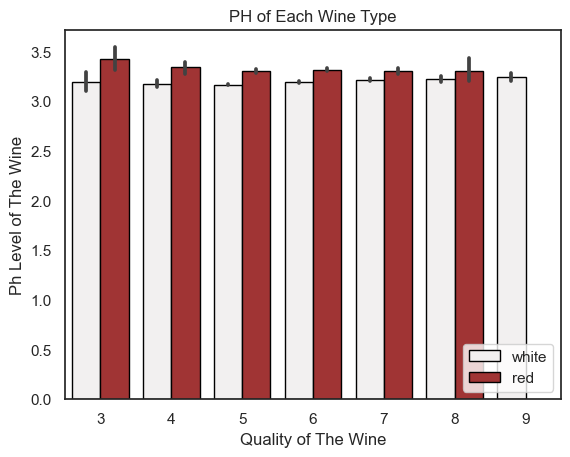

In [269]:
ph_quality()

# Is the mean of above average quality wine is equal to the mean of less than average quality wine

$H_o$: The mean of above average Quality wine is equal to the mean of less than average quality wine


$H_a$: The mean of above average Quality wine is not equal to the mean of less than average quality wine



In [341]:
def mean_quality():
    alpha= 0.5
    quality_avg= train.quality.mean()
    above_avg= train.quality > quality_avg

    t, p = stats.ttest_1samp(above_avg, quality_avg)
    t, p

    if p/2 > alpha:
        print("We fail to reject $H_{0}$")
    elif t < 0:
        print("We fail to reject $H_{0}$")
    else:
        print("We reject $H_{0}$")
mean_quality()

We fail to reject $H_{0}$


In [272]:
t, p = stats.ttest_1samp(above_avg, quality_avg)
t, p

(-648.8595953046708, 0.0)

In [273]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We fail to reject $H_{0}$


# Clustering

In [274]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [275]:
X = df[['citric_acid', 'sulphates']]

In [321]:
def clustering(df, f1, f2):
    
    seed = 7
    
    X = df[[f1, f2]]
    
    kmeans = KMeans(n_clusters = 4, random_state= seed)
    kmeans.fit(X)
    kmeans.predict(X)

    X['unscaled_cluster'] = kmeans.predict(X)
    
    mm_scaler = MinMaxScaler()
    X[[f1, f2]] = mm_scaler.fit_transform(X[[f1, f2]])
    
    kmeans_scale = KMeans(n_clusters = 4, random_state = 22)
    kmeans_scale.fit(X[[f1, f2]])
    kmeans_scale.predict(X[[f1, f2]])
    
    X['scaled_cluster'] = kmeans_scale.predict(X[[f1, f2]])
    
    return X

In [322]:
clustering(train, 'citric_acid', 'sulphates')

,citric_acid,sulphates,unscaled_cluster,scaled_cluster
3737,0.192771,0.050562,0,3
19,0.307229,0.483146,3,2
2200,0.240964,0.089888,0,3
4139,0.204819,0.140449,0,3
501,0.439759,0.353933,3,2
...,...,...,...,...
4918,0.168675,0.151685,0,3
3542,0.265060,0.168539,2,0
1884,0.150602,0.140449,0,3
2206,0.174699,0.089888,0,3


In [278]:
kmeans = KMeans(n_clusters = 4, random_state=7)

kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [279]:
X['unscaled_cluster']= kmeans.predict(X)

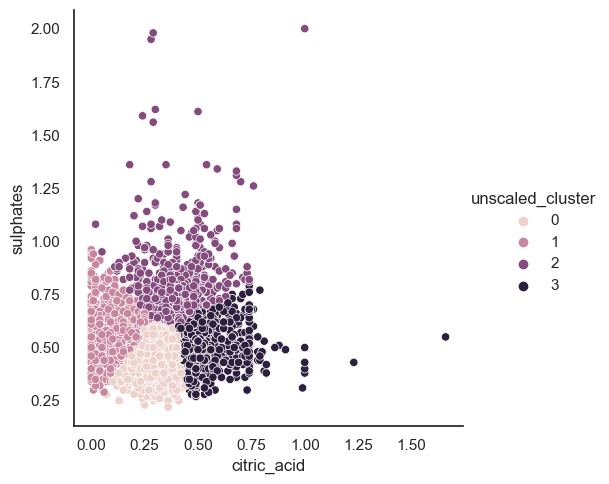

In [280]:
sns.relplot(data= X, x= 'citric_acid', y='sulphates', hue='unscaled_cluster')
plt.show()

In [281]:
mm_scaler= MinMaxScaler()

X[['citric_acid', 'sulphates']]= mm_scaler.fit_transform(X[['citric_acid', 'sulphates']])

X.head()

,citric_acid,sulphates,unscaled_cluster
0,0.000000,0.191011,1
1,0.000000,0.258427,1
2,0.024096,0.241573,1
3,0.337349,0.202247,3
4,0.000000,0.191011,1


In [282]:
kmeans_scale= KMeans(n_clusters=4, random_state = 7)

kmeans_scale.fit(X[['citric_acid', 'sulphates']])

KMeans(n_clusters=4, random_state=7)

In [283]:
X['scaled_cluster']= kmeans_scale.predict(f[['citric_acid', 'sulphates']])

In [284]:
X['quality']= df['quality']

In [285]:
X.head()

,citric_acid,sulphates,unscaled_cluster,scaled_cluster,quality
0,0.000000,0.191011,1,2,5
1,0.000000,0.258427,1,2,5
2,0.024096,0.241573,1,2,5
3,0.337349,0.202247,3,1,6
4,0.000000,0.191011,1,2,5


In [286]:
def cluster_relplot(df, f1, f2):
    
    sns.set(style="darkgrid")
    
    X = clustering(df, f1, f2)
    
    sns.relplot(data = X, x = f1, y = f2, hue = 'scaled_cluster')
    
    return plt.show()

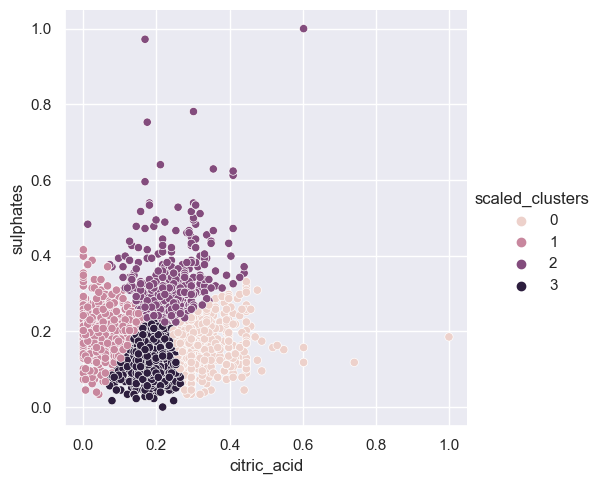

In [287]:
cluster_relplot(train, 'citric_acid', 'sulphates')

In [288]:
kmeans_scale.cluster_centers_

array([[0.18137946, 0.13444166],
       [0.31935212, 0.15892849],
       [0.0649076 , 0.20025862],
       [0.22830698, 0.31052786]])

In [289]:
kmeans_scale.inertia_

35.63871160495357

In [290]:
inertia= []
seed= 7

for i in range(1,11):
    kmeans= KMeans(n_clusters= i, random_state= seed)
    kmeans.fit(X[['citric_acid', 'sulphates']])
    inertia.append(kmeans.inertia_)
inertia

[95.18047272582791,
 64.54582104277289,
 47.368419235106586,
 35.63871160495357,
 28.88129162553286,
 25.280117567542362,
 21.814641018475207,
 19.51871341676804,
 17.68542402129568,
 16.1166780554676]

In [291]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                           'inertia': inertia})

results_df

,n_clusters,inertia
0,1,95.180473
1,2,64.545821
2,3,47.368419
3,4,35.638712
4,5,28.881292
5,6,25.280118
6,7,21.814641
7,8,19.518713
8,9,17.685424
9,10,16.116678


In [292]:
def best_cluster2(df, f1, f2):
    
    X = clustering(df, f1, f2)
    
    inertia = []
    seed = 22 

    for n in range(1,11):

        kmeans = KMeans(n_clusters = n, random_state = seed)

        kmeans.fit(X[[f1, f2]])

        inertia.append(kmeans.inertia_)
        
        
    results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                               'inertia': inertia})   
    
    sns.set_style("whitegrid")
    sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
    plt.xticks(np.arange(0, 11, step=1))
    point = (2, 5) # specify the x and y values of the point to annotate
    plt.annotate("optimal cluster", xy=point, xytext=(5, 125), 
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    return plt.show()

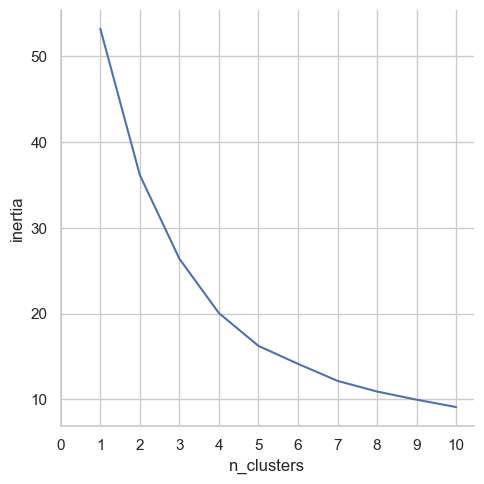

In [293]:
best_cluster2(train, 'citric_acid', 'sulphates')

$H_o$: The quality of wine is no dependent on the cluster

$H_a$: The quality of wine is dependent on the cluster

𝜶 = .05

In [294]:
def chi_test(feature, df):
    '''get result of chi-square for a feature to quality'''
    
    𝜶 = .05

    observed = pd.crosstab(df[feature], df.quality)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    if p < 𝜶:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

    print(f'chi² = {chi2:.3f}')
    print(f'p = {p:.3}')

In [295]:
chi_test('scaled_cluster', f)

We reject the null hypothesis.
chi² = 346.026
p = 1.52e-62


In [296]:
X

,citric_acid,sulphates,unscaled_cluster,scaled_cluster,quality
0,0.000000,0.191011,1,2,5
1,0.000000,0.258427,1,2,5
2,0.024096,0.241573,1,2,5
3,0.337349,0.202247,3,1,6
4,0.000000,0.191011,1,2,5
...,...,...,...,...,...
6492,0.174699,0.157303,0,0,6
6493,0.216867,0.134831,0,0,5
6494,0.114458,0.134831,0,0,6
6495,0.180723,0.089888,0,0,7


In [326]:
def combined_df(df, f1, f2):
    
    X = clustering(df, f1, f2)
    
    scaled_clusters = X['scaled_cluster']
    df = pd.merge(df, scaled_clusters, left_index=True, right_index=True)
    
    return df

In [327]:
f

,citric_acid,sulphates,unscaled_cluster,scaled_cluster,quality
0,0.000000,0.191011,1,2,5
1,0.000000,0.258427,1,2,5
2,0.024096,0.241573,1,2,5
3,0.337349,0.202247,3,1,6
4,0.000000,0.191011,1,2,5
...,...,...,...,...,...
6492,0.174699,0.157303,0,0,6
6493,0.216867,0.134831,0,0,5
6494,0.114458,0.134831,0,0,6
6495,0.180723,0.089888,0,0,7


In [328]:
combined_df(df, 'citric_acid', 'sulphates')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,2


In [329]:
def six_split(train, val, test, target):
    """
    this functions splits the data into 6 different datasets. We will use them for 
    our modeling 
    """
    # split into X and y train dataset 
    X_train= train.drop(columns=[target])
    y_train= train[target]

    # split into X and y val dataset 
    X_val= val.drop(columns=[target])
    y_val= val[target]

    # split into X and y test dataset 
    X_test= test.drop(columns=[target])
    y_test= test[target]

    y_train= pd.DataFrame(y_train)
    y_val= pd.DataFrame(y_val)
    y_test= pd.DataFrame(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [330]:
 X_train, y_train, X_val, y_val, X_test, y_test= six_split(train, val, test, 'quality')

In [331]:
columns_scale = train.iloc[:, :11]
columns_to_scale = columns_scale.columns

def mvp_scaled_data(train, 
               validate, 
               test, 
               columns_to_scale = columns_to_scale,
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    mms = MinMaxScaler()
    #     fit the thing
    mms.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(mms.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(mms.transform(validate[columns_to_scale]), 
                                                     columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(mms.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [332]:
train_scaled, val_scaled, test_scaled = mvp_scaled_data(train, val, test, columns_to_scale = columns_to_scale, return_scaler = False)

In [333]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((3637, 13), (1560, 13), (1300, 13))

In [334]:
def splitting_subsets(train, train_scaled, val_scaled, test_scaled):
    
    X_train = train_scaled.drop(columns = ['quality'])
    X_train = pd.get_dummies(X_train, columns = ['type', 'scaled_cluster'])
    y_train = train_scaled['quality']


    X_validate = validate_scaled.drop(columns = ['quality'])
    X_validate = pd.get_dummies(X_validate, columns = ['type', 'scaled_cluster'])
    y_validate = validate_scaled['quality']


    X_test = test_scaled.drop(columns = ['quality'])
    X_test = pd.get_dummies(X_test, columns = ['type', 'scaled_cluster'])
    y_test = test_scaled['quality']

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [335]:
X_train, y_train, X_validate, y_validate, X_test, y_test= splitting_subsets(train, train_scaled, val_scaled, test_scaled)

KeyError: "['scaled_cluster'] not in index"

In [ ]:
X_train

# Feat eng